In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , RobustScaler , QuantileTransformer , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import GridSearchCV
import joblib

In [11]:
df = pd.read_csv('/Users/raidneghiz/Documents/Streamlit/Expresso_churn_dataset.csv')
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [12]:
df.shape

(2154048, 19)

In [13]:
total_customers = len(df)
retained_customers = len(df[df['CHURN'] == 0])
churned_customers = len(df[df['CHURN'] == 1])
churn_rate = churned_customers / total_customers * 100

fig = go.Figure()

# Total Customers
fig.add_trace(go.Indicator(
    mode="number",
    value=total_customers,
    title="Total Customers",
    number={'font': {'size': 25}},
    domain={'x': [0, 0.25], 'y': [0, 1]}
))

# Retained Customers
fig.add_trace(go.Indicator(
    mode="number",
    value=retained_customers,
    title="Retained Customers",
#    titlefont={'size': 12, 'font-weight': 'bold'},
    number={'font': {'size': 25}},
    domain={'x': [0.3, 0.55], 'y': [0, 1]}
))
# Churned Customers
fig.add_trace(go.Indicator(
    mode="number",
    value=churned_customers,
    title="Churned Customers",
    number={'font': {'size': 25}},
    domain={'x': [0.6, 0.85], 'y': [0, 1]}
))

# Churn Rate
fig.add_trace(go.Indicator(
    mode="number+delta",
    value=churn_rate,
    title="Churn Rate",
    number={'font': {'size': 20}, 'suffix': '%'},
    delta={'reference': 0, 'relative': False, 'position': "bottom"},
    domain={'x': [0.9, 1], 'y': [0, 1]}
))

fig.update_layout(width=1000, height=100, margin=dict(t=50, b=50, l=10, r=10))
fig.show()

In [14]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [15]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [16]:
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1
2,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,1.0,0
3,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,11.0,0
4,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,0
2154044,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,55,9.0,0
2154045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1
2154046,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,28,12.0,0


In [17]:
df['TENURE'].value_counts()

TENURE
K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: count, dtype: int64

In [18]:
df['TOP_PACK'].value_counts()

TOP_PACK
All-net 500F=2000F;5d             317802
On net 200F=Unlimited _call24H    152295
Data:490F=1GB,7d                  115180
Data: 100 F=40MB,24H               84649
Mixt 250F=Unlimited_call24H        67512
                                   ...  
CVM_150F_unlimited                     1
YMGX on-net 100=700F, 24H              1
Postpaid FORFAIT 10H Package           1
pilot_offer5                           1
Package3_Monthly                       1
Name: count, Length: 140, dtype: int64

In [19]:
df['REGION'].value_counts()

REGION
DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: count, dtype: int64

In [20]:
df.isna().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [21]:
# Replacing missing values for numeric columns
for column in df.select_dtypes(include=[np.number]).columns:
    df[column] = df[column].fillna(df[column].mean()) 

# Replacing missing values for object (categorical) columns
for column in df.select_dtypes(include=["object"]).columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])  

In [22]:
df.isna().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df1 = df.copy()

In [25]:
encoder = LabelEncoder()

df1['REGION'] = encoder.fit_transform(df1['REGION'])
df1['TENURE'] = encoder.fit_transform(df1['TENURE'])
df1['TOP_PACK'] = encoder.fit_transform(df1['TOP_PACK'])
df1['user_id'] = encoder.fit_transform(df1['user_id'])
df1['MRG'] = encoder.fit_transform(df1['MRG'])

In [26]:
df1['TENURE'].unique()

array([7, 5, 3, 4, 6, 2, 0, 1])

<Axes: >

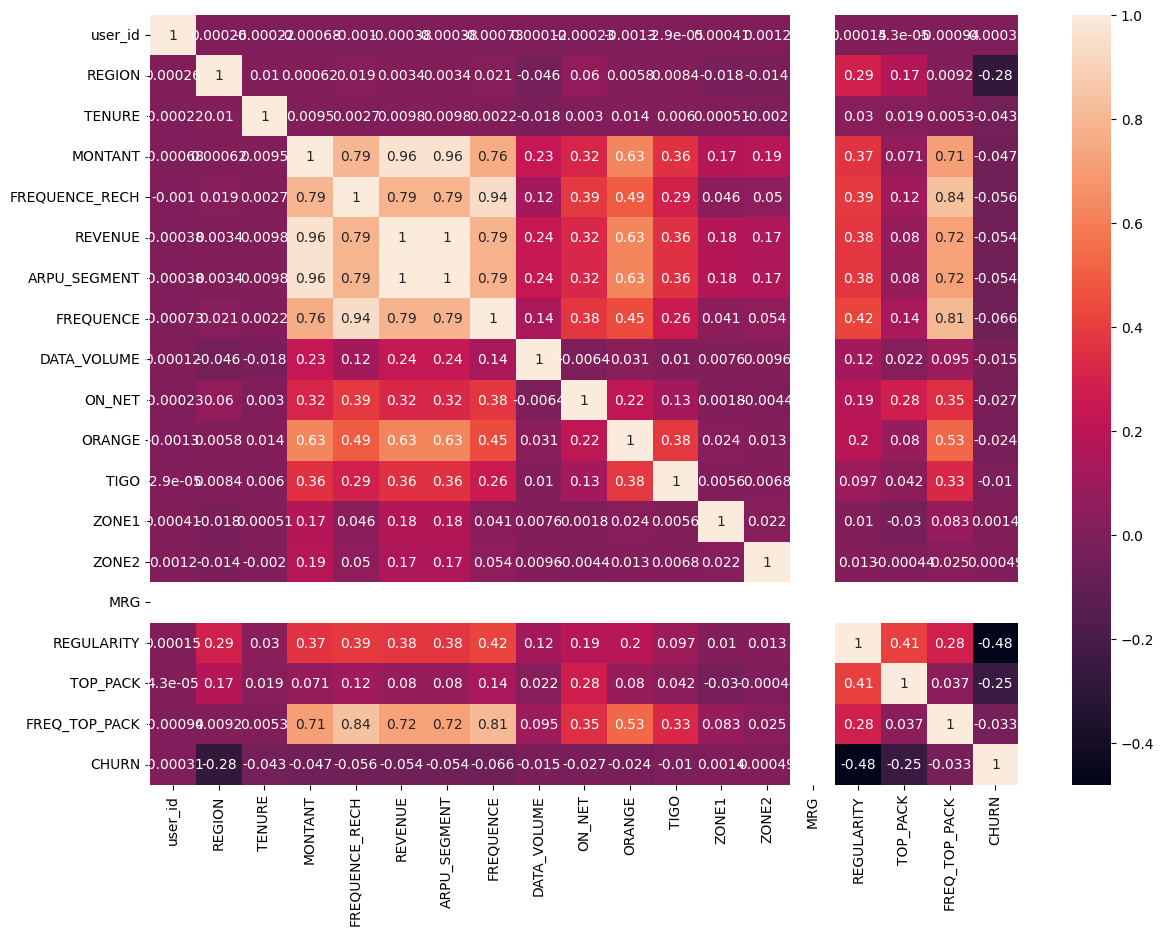

In [27]:
correlations = df1.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlations , annot = True)

In [28]:
df1 = df1.drop(columns=['ARPU_SEGMENT' , 'user_id'])

In [29]:
df1

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,2,7,4250.000000,15.00000,4251.000000,17.000000,4.000000,388.00000,46.000000,1.000000,1.000000,2.000000,0,54,107,8.000000,0
1,0,5,5532.116998,11.52912,5510.810334,13.978141,3366.450167,277.68914,95.418711,23.109253,8.170132,7.553309,0,4,18,9.272461,1
2,0,7,3600.000000,2.00000,1020.000000,2.000000,3366.450167,90.00000,46.000000,7.000000,8.170132,7.553309,0,17,108,1.000000,0
3,0,7,13500.000000,15.00000,13502.000000,18.000000,43804.000000,41.00000,102.000000,2.000000,8.170132,7.553309,0,62,35,11.000000,0
4,0,7,1000.000000,1.00000,985.000000,1.000000,3366.450167,39.00000,24.000000,23.109253,8.170132,7.553309,0,11,100,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,0,7,5532.116998,11.52912,5510.810334,13.978141,3366.450167,277.68914,95.418711,23.109253,8.170132,7.553309,0,6,18,9.272461,0
2154044,12,7,6100.000000,15.00000,5800.000000,15.000000,621.000000,26.00000,40.000000,40.000000,8.170132,7.553309,0,55,31,9.000000,0
2154045,0,7,5532.116998,11.52912,5510.810334,13.978141,3366.450167,277.68914,95.418711,23.109253,8.170132,7.553309,0,1,18,9.272461,1
2154046,12,7,10000.000000,11.00000,7120.000000,13.000000,3366.450167,0.00000,140.000000,13.000000,8.170132,7.553309,0,28,18,12.000000,0


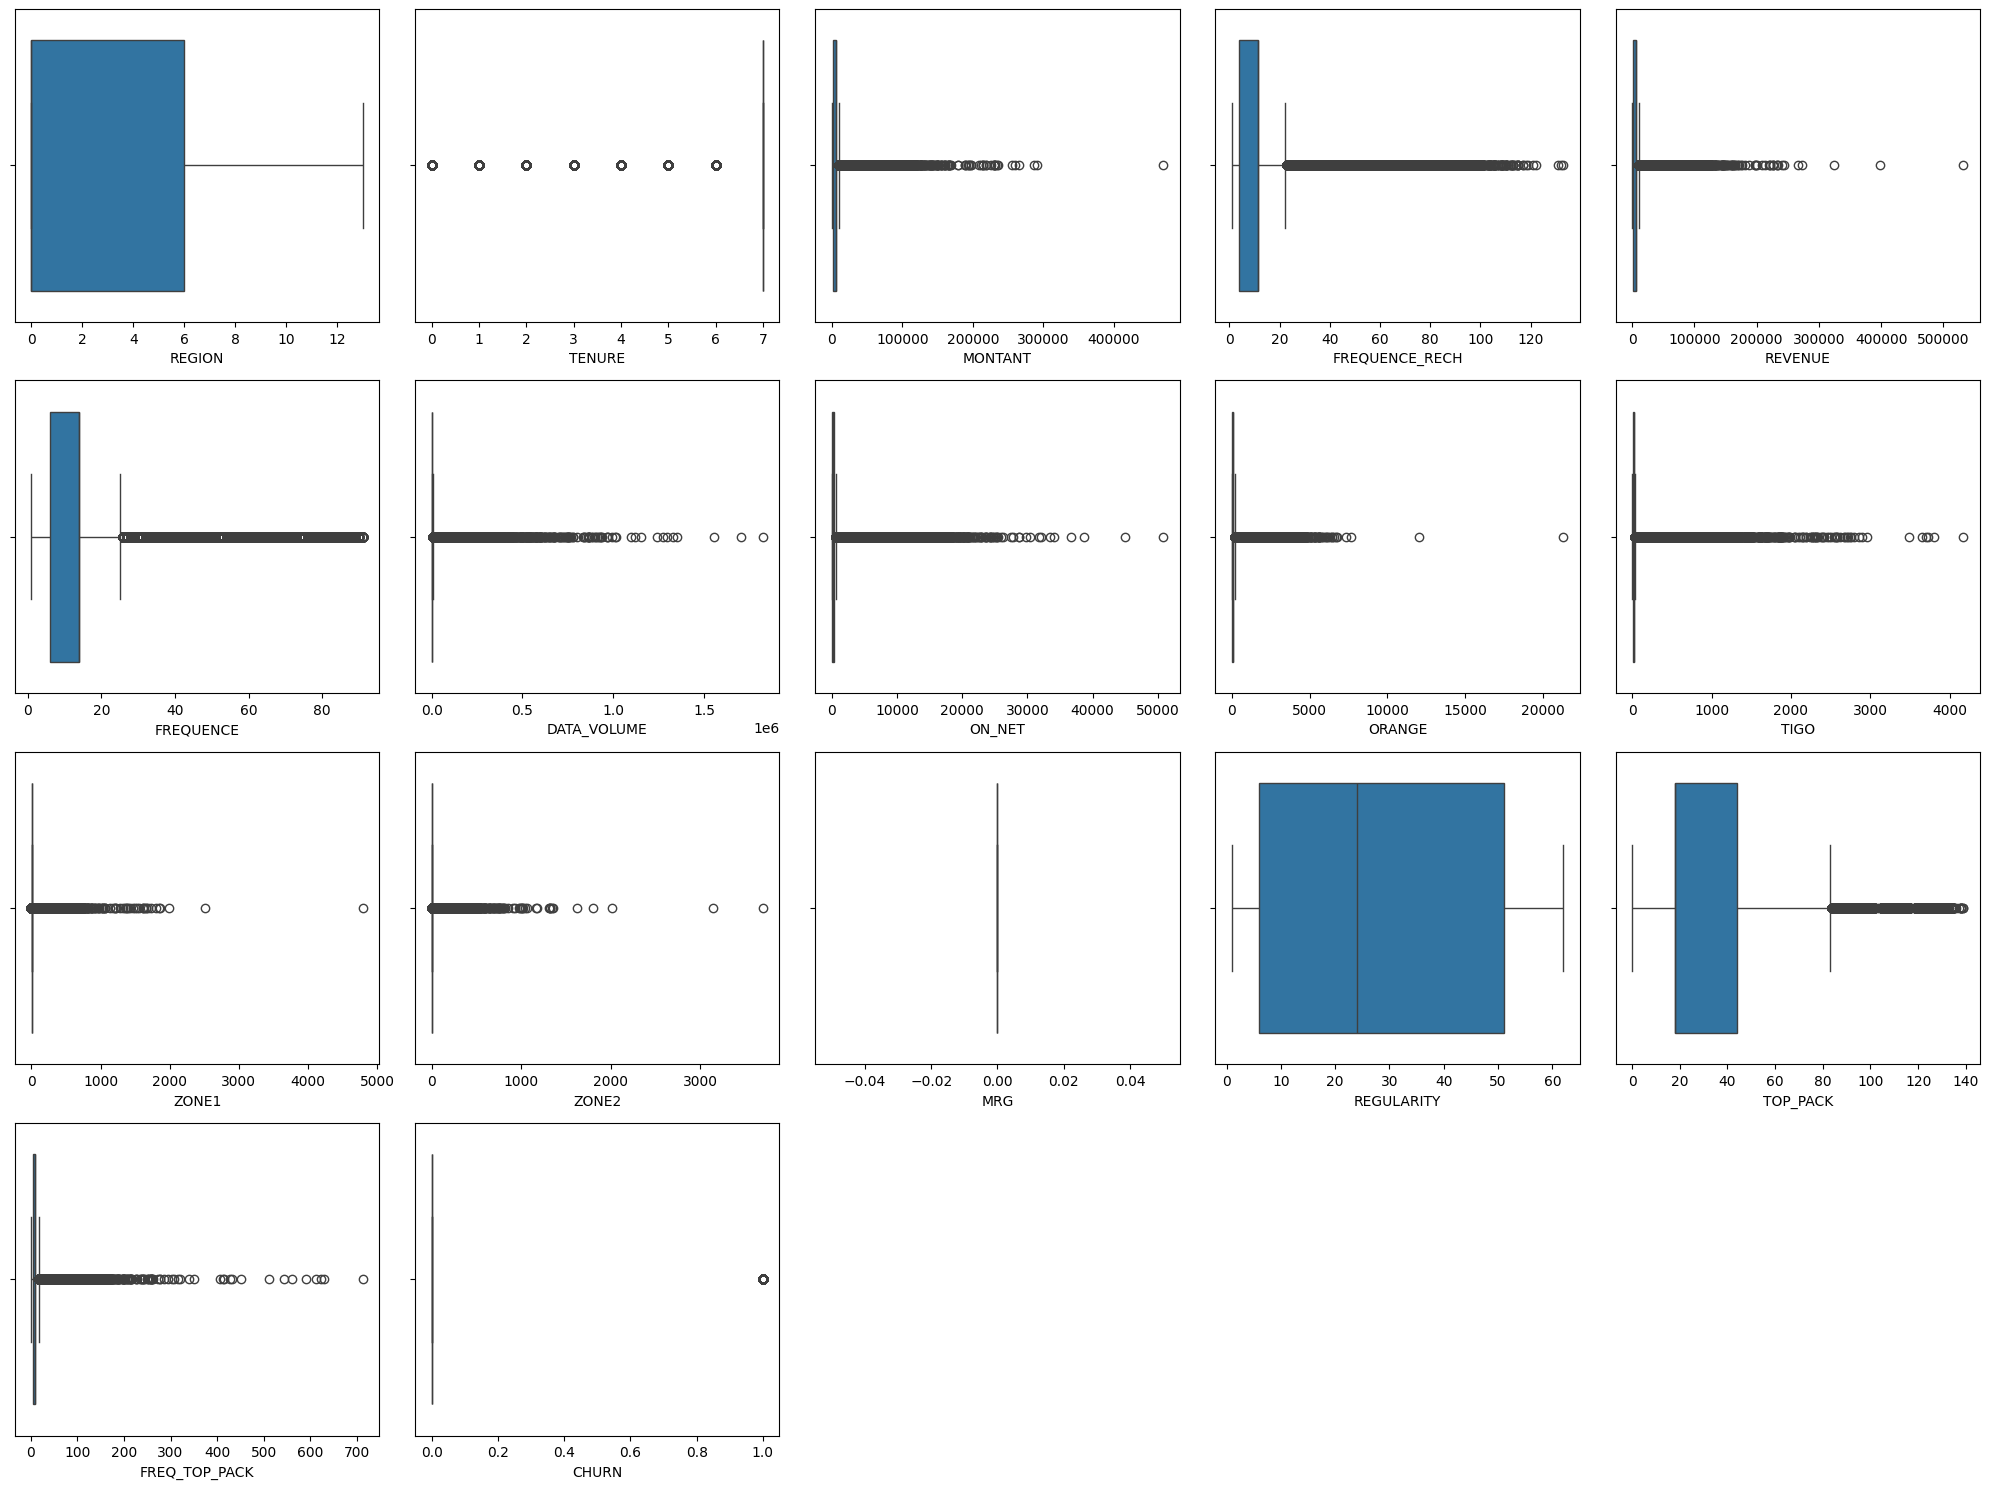

In [30]:
def box_plots(df) : 
    plt.figure(figsize=(20,15))
    for i , column in enumerate(df.columns) :
        ax = plt.subplot(len(df.columns) // 5 +1  , 5 , i+1)  
        sns.boxplot(data = df , x=column , ax= ax )
        ax.set_xlabel(column)
        
    plt.tight_layout()
    plt.show()

box_plots(df1)

In [31]:
df2 = df1.copy()

In [32]:
def removing_outliers(df , column_name) : 
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3-Q1
    min_boundry = Q1 - 1.5*IQR
    max_boundry = Q3 + 1.5 * IQR
    return min_boundry , max_boundry


for column in df2.columns : 
    minimum_boundry , maximum_boundry = removing_outliers(df2 , column)
    df2 = df2[(df2[column] >= minimum_boundry) & (df2[column] <= maximum_boundry)]


In [33]:
df2.shape

(771366, 17)

In [34]:
x= df1.drop(columns='CHURN')
y = df1['CHURN']

In [35]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x , columns=['REGION','TENURE','MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME',
                                  'ON_NET','ORANGE','TIGO','ZONE1','ZONE2','MRG','REGULARITY','TOP_PACK','FREQ_TOP_PACK'] )

In [36]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state= 42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1723238, 16), (430810, 16), (1723238,), (430810,))

In [38]:
x_train

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
530324,-0.644661,0.211319,-7.912821e-01,-8.913132e-01,-7.023136e-01,-0.834012,-4.796986e-17,-3.763662e-01,-2.324059e-01,1.764598e-16,1.537148e-16,-2.104743e-16,0.0,-0.315994,-0.015347,-6.701073e-01
1506483,0.979873,0.211319,8.168973e-02,-5.171703e-01,-8.934154e-02,0.754082,-4.796986e-17,-3.907484e-01,-3.983249e-01,-5.242379e-01,1.537148e-16,-2.104743e-16,0.0,-0.001907,-0.645782,1.897739e-16
705413,-0.412585,0.211319,4.763779e-16,4.984585e-16,1.554209e-16,0.000000,-3.551162e-01,8.175326e-17,9.068654e-17,1.764598e-16,1.537148e-16,-2.104743e-16,0.0,-0.091646,-0.645782,1.897739e-16
174670,0.747797,0.211319,-9.309575e-01,-9.848489e-01,-9.075490e-01,-1.084764,-4.796986e-17,8.175326e-17,9.068654e-17,1.764598e-16,1.537148e-16,-2.104743e-16,0.0,0.087832,1.904612,-8.837738e-01
1821532,-0.644661,0.211319,-7.039849e-01,-8.913132e-01,-6.836869e-01,-0.917596,-1.987847e-01,-3.993777e-01,-4.940473e-01,-5.242379e-01,1.537148e-16,-2.104743e-16,0.0,-1.078775,-0.645782,-8.837738e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003274,-0.644661,0.211319,-6.690660e-01,-3.300988e-01,-6.512183e-01,-0.416093,-4.796986e-17,1.960448e-01,-3.727989e-01,9.662479e-02,1.537148e-16,-2.104743e-16,0.0,0.850613,1.904612,-2.427744e-01
1570006,1.908178,0.211319,-5.293905e-01,-6.107060e-01,-5.145086e-01,-0.750428,-3.551162e-01,-3.619840e-01,2.844954e-01,-4.994034e-01,1.537148e-16,-2.104743e-16,0.0,-0.899297,1.245522,-7.769406e-01
732180,-0.644661,0.211319,2.737435e-01,4.181870e-01,2.714011e-01,0.419747,-3.359176e-01,-2.152857e-01,-2.643134e-01,-3.752309e-01,1.537148e-16,-2.104743e-16,0.0,1.209569,-0.703094,1.845585e-01
110268,-0.644661,0.211319,4.763779e-16,4.984585e-16,-9.015679e-01,-0.248925,-3.551162e-01,-3.993777e-01,-6.025328e-01,1.764598e-16,1.537148e-16,-7.764787e-01,0.0,-0.719819,-0.645782,1.897739e-16


In [ ]:
logistic_reg = LogisticRegression(max_iter= 10000)
logistic_reg.fit(x_train , y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = logistic_reg.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test , y_pred)
accuracy

0.8678466145168404

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth= 10)
decision_tree.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred =decision_tree.predict(x_test)

In [ ]:
DT_accuracy = accuracy_score(y_test , y_pred)
DT_accuracy

0.872498317123558

In [ ]:
random_forest = RandomForestClassifier(n_estimators= 25)
random_forest.fit(x_train , y_train)

RandomForestClassifier(n_estimators=25)

In [ ]:
y_pred = random_forest.predict(x_test)

In [ ]:
RF_accuracy = accuracy_score(y_test , y_pred)
RF_accuracy

0.8683526380538985

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 10 , n_jobs= -1)
knn.fit(x_train , y_train)


KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [ ]:
y_pred =knn.predict(x_test)

In [ ]:
knn_accuracy = accuracy_score(y_test , y_pred)
knn_accuracy

0.8335994986188807

In [ ]:
joblib.dump(decision_tree , 'decision_tree.pkl')

['decision_tree.pkl']